In [2]:
'''
@author :TechCant
@tf_version:2.2
@GPU:GTX-2060
@os:Windows/Linux
@Cuda : 

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Wed_Oct_23_19:24:38_PDT_2019
Cuda compilation tools, release 10.2, V10.2.89

problem-Defination : 

Build a CNN model that classifies the given pet images correctly into dog and cat images. 
The project scope document specifies the requirements for the project “Pet Classification Model Using CNN.”
Apart from specifying the functional and nonfunctional requirements for the project, it also serves as an input for project scoping. 


'''
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only use the first GPU
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPU


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [6]:
PATH='./data/'
train_dir = os.path.join(PATH, 'train')
test_dir=os.path.join(PATH,'test')
                      

In [7]:
cats_train=os.path.join(train_dir,'cats')
dogs_train=os.path.join(train_dir,'dogs')
dogs_test=os.path.join(test_dir,'dogs')
cats_test=os.path.join(test_dir,'cats')

In [8]:
num_cats_tr = len(os.listdir(cats_train))
num_dogs_tr = len(os.listdir(dogs_train))

num_cats_val = len(os.listdir(cats_test))
num_dogs_val = len(os.listdir(dogs_test))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [9]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 20
total training dog images: 20
total validation cat images: 10
total validation dog images: 10
--
Total training images: 40
Total validation images: 20


In [10]:
batch_size = 5
epochs = 10
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [11]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [12]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 40 images belonging to 2 classes.


In [13]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 20 images belonging to 2 classes.


In [14]:
sample_training_images, _ = next(train_data_gen)


In [15]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

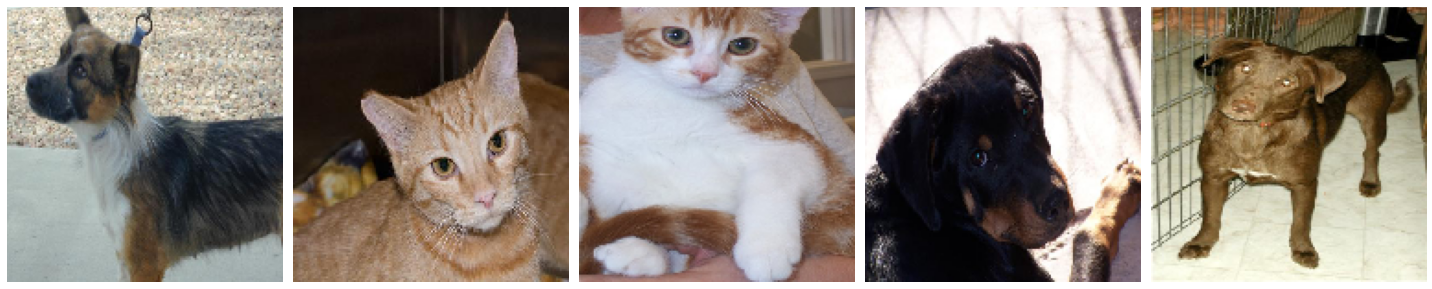

In [16]:
plotImages(sample_training_images[:5])


In [17]:
print(sample_training_images[3])

[[[0.2509804  0.26666668 0.3803922 ]
  [0.26666668 0.28235295 0.38823533]
  [0.2784314  0.28627452 0.38431376]
  ...
  [0.34117648 0.2627451  0.26666668]
  [0.35686275 0.2784314  0.28235295]
  [0.36078432 0.2784314  0.29803923]]

 [[0.27450982 0.28235295 0.32941177]
  [0.28235295 0.28235295 0.32941177]
  [0.28235295 0.28235295 0.32156864]
  ...
  [0.37254903 0.29411766 0.29803923]
  [0.3647059  0.28627452 0.2901961 ]
  [0.41176474 0.3372549  0.32156864]]

 [[0.52156866 0.5058824  0.49411768]
  [0.62352943 0.6039216  0.5921569 ]
  [0.64705884 0.6156863  0.6039216 ]
  ...
  [0.36862746 0.2901961  0.29411766]
  [0.38431376 0.30588236 0.30980393]
  [0.41960788 0.34509805 0.32156864]]

 ...

 [[0.12941177 0.1254902  0.15686275]
  [0.09803922 0.09803922 0.10588236]
  [0.18039216 0.18039216 0.18039216]
  ...
  [0.5058824  0.43921572 0.4784314 ]
  [0.49411768 0.427451   0.4666667 ]
  [0.4901961  0.42352945 0.48627454]]

 [[0.08235294 0.07843138 0.10980393]
  [0.1137255  0.1137255  0.12156864]


In [18]:
#Model Creation 
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [20]:
import datetime

!rm -rf ./logs/ 
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

if gpus:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    print("BUILDING MODEL USING GPU .... ",gpus)
    history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=100 // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)
else:
    print("BUILDING MODEL USING CPU .... ")
    history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=100 // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)
    

1 Physical GPUs, 1 Logical GPU
BUILDING MODEL USING GPU ....  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
20/20 [==============================] - 0s 15ms/step - loss: 0.8569 - acc: 0.5100 - val_loss: 0.7633 - val_acc: 0.3500
Epoch 2/10
20/20 [==============================] - 0s 17ms/step - loss: 0.5880 - acc: 0.6600 - val_loss: 0.9163 - val_acc: 0.4000
Epoch 3/10
20/20 [==============================] - 0s 18ms/step - loss: 0.3214 - acc: 0.8900 - val_loss: 1.2650 - val_acc: 0.5000
Epoch 4/10
20/20 [==============================] - 0s 18ms/step - loss: 0.0846 - acc: 0.9800 - val_loss: 1.3796 - val_acc: 0.6000
Epoch 5/10
20/20 [==============================] - 0s 17ms/step - loss: 0.0063 - acc: 1.0000 - val_loss: 1.9772 - val_acc: 0.6000
Epoch 6/10
20/20 [==============================] - 0s 17ms/step - loss: 3.4944e-04 - acc: 1.0000 - val_loss: 1.9806 - val_acc: 0.5500
Epoch

In [21]:
print(history.history)

{'loss': [0.8568516552448273, 0.5879657946527004, 0.3214011644944549, 0.0846270103007555, 0.006293206375994486, 0.00034944465096486965, 0.0002459804902173346, 0.00014151099667287782, 0.0001411176087003696, 0.00010337037178373976], 'acc': [0.51, 0.66, 0.89, 0.98, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [0.7632722854614258, 0.9162584394216537, 1.2649817317724228, 1.3795544505119324, 1.9772097617387772, 1.9806071519851685, 2.0656555891036987, 2.0473833233118057, 2.0384128391742706, 2.0467426627874374], 'val_acc': [0.35, 0.4, 0.5, 0.6, 0.6, 0.55, 0.65, 0.7, 0.65, 0.65]}


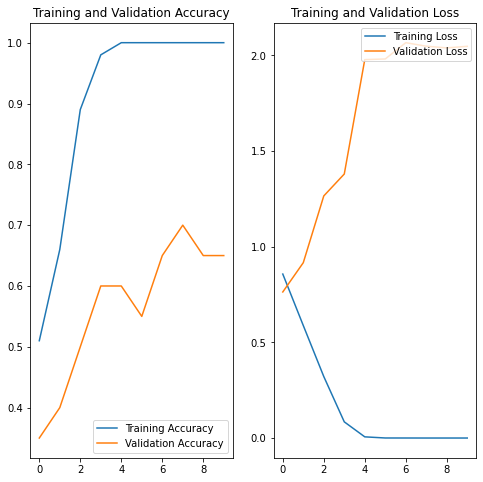

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()